# Airbnb NYC the big apple analysis

Import libraries

In [1]:
#import main libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from math import e
import sklearn.metrics as sm
import seaborn as sns
import functions as f

%matplotlib inline


## The Dataset

In [2]:
#get main dataset
dtypes = {'Listing ID': 'int',
          'Name': 'str',
          'Host ID': 'int',
          'Host Name': 'str',
          'Host Response Rate' : 'float',
          'Host Is Superhost': 'bool',
          'Host total listings count' : 'float',
          'Street' : 'str', 
          'City' : 'str', 
          'Neighbourhood cleansed' : 'str',
          'State' : 'str', 
          'Country' : 'str',
          'latitude': 'float',
          'longitude': 'float',
          'Property type': 'str',
          'Room type': 'str',
          'Accommodates': 'float',
          'Bathrooms': 'float',
          'Bedrooms': 'float',
          'Amenities': 'str',
          'Price': 'float',
          'Minimum nights': 'float',
          'Maximum nights': 'float',
          'Availability 365': 'float',
          'Calendar last scraped': 'object',
          'Number of reviews': 'float',
          'Last Review Date': 'object',
          'Review Scores Rating': 'float',
          'Review Scores Accuracy': 'float',
          'Review Scores Cleanliness': 'float',
          'Review Scores Checkin': 'float',
          'Review Scores Communication' : 'float',
          'Review Scores Location': 'float',
          'Review Scores Value': 'float',
          'Reviews per month': 'float'

}

df = pd.read_csv("./Datasets/NY_Listings.csv", sep=",", encoding = "ISO8859-1", dtype =dtypes)

df.head()

,Listing ID,Name,Host ID,Host Name,Host Response Rate,Host Is Superhost,Host total listings count,Street,City,Neighbourhood cleansed,...,Number of reviews,Last Review Date,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Reviews per month
0,2515,Sunny Private Room,16286162,Pat,1.0,False,4.0,Bronx| NY| United States,Bronx,Allerton,...,66.0,8/25/17,96.0,10.0,9.0,10.0,10.0,9.0,10.0,1.77
1,2539,Comfy bedroom minutes to Manhattan,44260966,Alicia,1.0,False,1.0,Bronx| NY| United States,Bronx,Soundview,...,38.0,9/8/17,89.0,10.0,9.0,9.0,10.0,9.0,9.0,1.54
2,2595,Spacious RM in Private Home; Backyard/Near Metro,105394139,Ciprian,1.0,False,16.0,Bronx| NY| United States,Bronx,Fordham,...,18.0,9/4/17,90.0,9.0,9.0,10.0,9.0,9.0,9.0,3.83
3,3330,Modern Bronx Treasure!,104262517,Felicia,0.7,False,1.0,Bronx | NY| United States,Bronx,Fordham,...,7.0,4/23/17,85.0,9.0,10.0,8.0,9.0,9.0,9.0,0.67
4,3647,Good Vibes Sanctuary,58126473,Miriam,1.0,False,1.0,Bronx| NY| United States,Bronx,Fordham,...,56.0,9/20/17,95.0,10.0,10.0,10.0,10.0,9.0,10.0,3.70


In [3]:
df.shape

(75749, 35)

In [4]:
df[['Accommodates',
       'Bathrooms', 'Bedrooms', 'Price', 'Minimum nights',
       'Maximum nights', 'Availability 365']].describe()

,Accommodates,Bathrooms,Bedrooms,Price,Minimum nights,Maximum nights,Availability 365
count,44310.000000,44168.000000,44310.000000,75749.000000,75749.000000,4.431000e+04,75749.000000
mean,2.813044,1.132585,1.249650,154.545750,5.922771,6.422378e+04,131.238459
std,1.852875,0.412137,0.625075,347.382531,16.945500,1.049282e+07,137.885702
min,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000e+00,0.000000
25%,2.000000,1.000000,1.000000,69.000000,1.000000,2.900000e+01,0.000000
50%,2.000000,1.000000,1.000000,105.000000,2.000000,1.125000e+03,79.000000
75%,4.000000,1.000000,1.000000,175.000000,4.000000,1.125000e+03,276.000000
max,16.000000,15.500000,14.000000,10000.000000,1250.000000,2.147484e+09,365.000000


In [5]:
df[['Number of reviews', 'Last Review Date', 'Review Scores Rating',
       'Review Scores Accuracy', 'Review Scores Cleanliness',
       'Review Scores Checkin', 'Review Scores Communication',
       'Review Scores Location', 'Review Scores Value',
       'Reviews per month']].describe()

,Number of reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Reviews per month
count,75749.000000,75749.000000,75749.000000,75749.000000,75749.000000,75749.000000,75749.000000,75749.000000,75749.000000
mean,16.589037,43.749066,4.312427,4.166392,4.371226,4.393761,4.243026,4.212689,1.135216
std,30.575433,246.049250,4.792759,4.652702,4.860567,4.871489,4.729948,4.701490,1.602724
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.450000
75%,18.000000,95.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,1.660000
max,730.000000,38425.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,66.360000


## Cleaning the dataset

In [6]:
analysisDataFrame = df

<AxesSubplot:xlabel='Review Scores Rating'>

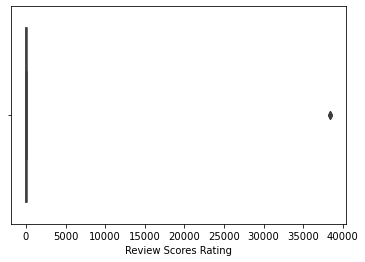

In [7]:
sns.boxplot(x=analysisDataFrame['Review Scores Rating'])

In [8]:
analysisDataFrame = analysisDataFrame[analysisDataFrame["Review Scores Rating"] != 0]

analysisDataFrame = analysisDataFrame[analysisDataFrame["Review Scores Rating"] < 100]

<AxesSubplot:xlabel='Review Scores Rating'>

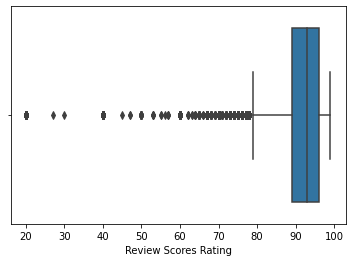

In [9]:
sns.boxplot(x=analysisDataFrame['Review Scores Rating'])

In [10]:
countRateNA = lambda col : col.isna().sum()/col.shape[0]

nullColumns = analysisDataFrame.apply(countRateNA,axis=0)
nullColumns = nullColumns.sort_values(ascending = False)

nullColumns = nullColumns[~(nullColumns.where(nullColumns>0).isnull())]

nullColumns

Host Response Rate           0.177989
Host Name                    0.005235
Host total listings count    0.005235
Bathrooms                    0.003967
Amenities                    0.002168
Name                         0.000245
Last Review Date             0.000041
dtype: float64

In [11]:
analysisDataFrame["Last Review Date"]= pd.to_datetime(analysisDataFrame["Last Review Date"])

analysisDataFrame['Last Review Date'].fillna(min(analysisDataFrame["Last Review Date"]), inplace=True)

In [12]:
analysisDataFrame['Bedrooms'] = analysisDataFrame.groupby(['Property type'], sort=False)['Bedrooms'].apply(lambda x: x.fillna(x.mean()))

analysisDataFrame['Bedrooms'].fillna((analysisDataFrame['Bedrooms'].mean()), inplace=True)

In [13]:
analysisDataFrame['Accommodates'] = analysisDataFrame.groupby(['Property type', 'Bedrooms'], sort=False)['Accommodates'].apply(lambda x: x.fillna(x.mean()))

analysisDataFrame['Accommodates'].fillna((analysisDataFrame['Accommodates'].mean()), inplace=True)

In [14]:
analysisDataFrame['Bathrooms'] = analysisDataFrame.groupby(['Property type', 'Bedrooms','Accommodates'], sort=False)['Bathrooms'].apply(lambda x: x.fillna(x.mean()))

analysisDataFrame['Bathrooms'].fillna((analysisDataFrame['Bathrooms'].mean()), inplace=True)

In [15]:
analysisDataFrame['Host Response Rate'].fillna(0, inplace=True)

In [16]:
analysisDataFrame['Host total listings count'].fillna(1, inplace=True)

In [17]:
analysisDataFrame['Name'].fillna("NA", inplace=True)

analysisDataFrame['Host Name'].fillna("NA", inplace=True)

In [18]:
def pars_string(df,col1):
    
    splitCol=df[col1].value_counts().reset_index()
    splitCol['index']=splitCol['index'].str.split(";")
    # get the list from all of the answer
    df1=[]
    for i in range(splitCol.shape[0]):
        for j in splitCol['index'][i]:
            df1.append(j)
    # get unique value from df1
    list_1=list(set(df1))
    # there are some leading or trailing spaces in the list_1 which need to be deleted to get unique value 
    list_2=[x.strip(' ') for x in list_1]
    # get unique value from list_2
    list_3=list(set(list_2))
    
    return(list_3)

Amenities = pars_string(analysisDataFrame,"Amenities")

analysisDataFrame["Amenities"] = analysisDataFrame["Amenities"].str.replace('[^A-Za-z0-9 ;]+', '')

for Amenitie in Amenities:
    #print(Amenitie)
    
    Amenitie = re.sub('[^A-Za-z0-9 ;]+', '', Amenitie)
    
    analysisDataFrame = pd.concat([analysisDataFrame, (analysisDataFrame["Amenities"].str.contains(Amenitie)*1).rename(Amenitie)], axis=1)
    analysisDataFrame[Amenitie] = analysisDataFrame[Amenitie].fillna(0)


analysisDataFrame = analysisDataFrame.drop(columns=["Amenities"])

In [19]:
analysisDataFrame.head()

,Listing ID,Name,Host ID,Host Name,Host Response Rate,Host Is Superhost,Host total listings count,Street,City,Neighbourhood cleansed,...,Refrigerator,Breakfast,Self CheckIn,Bed linens,Accessibleheight toilet,Iron,Free parking on street,Pack n Playtravel crib,Lake access,Wireless Internet
0,2515,Sunny Private Room,16286162,Pat,1.0,False,4.0,Bronx| NY| United States,Bronx,Allerton,...,1,0,0,1,0,1,0,0,0,1
1,2539,Comfy bedroom minutes to Manhattan,44260966,Alicia,1.0,False,1.0,Bronx| NY| United States,Bronx,Soundview,...,0,0,0,0,0,1,0,0,0,1
2,2595,Spacious RM in Private Home; Backyard/Near Metro,105394139,Ciprian,1.0,False,16.0,Bronx| NY| United States,Bronx,Fordham,...,0,0,1,0,0,1,0,0,0,1
3,3330,Modern Bronx Treasure!,104262517,Felicia,0.7,False,1.0,Bronx | NY| United States,Bronx,Fordham,...,0,0,0,0,0,1,0,0,0,1
4,3647,Good Vibes Sanctuary,58126473,Miriam,1.0,False,1.0,Bronx| NY| United States,Bronx,Fordham,...,1,0,0,0,0,1,0,0,0,1


In [20]:
nullColumns = analysisDataFrame.apply(countRateNA,axis=0)
nullColumns = nullColumns.sort_values(ascending = False)

nullColumns = nullColumns[~(nullColumns.where(nullColumns>0).isnull())]

nullColumns.shape

(0,)

In [21]:
analysisDataFrame.columns.values

array(['Listing ID', 'Name', 'Host ID', 'Host Name', 'Host Response Rate',
       'Host Is Superhost', 'Host total listings count', 'Street', 'City',
       'Neighbourhood cleansed', 'State', 'Country', 'latitude',
       'longitude', 'Property type', 'Room type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Price', 'Minimum nights',
       'Maximum nights', 'Availability 365', 'Calendar last scraped',
       'Number of reviews', 'Last Review Date', 'Review Scores Rating',
       'Review Scores Accuracy', 'Review Scores Cleanliness',
       'Review Scores Checkin', 'Review Scores Communication',
       'Review Scores Location', 'Review Scores Value',
       'Reviews per month', 'Hot tub',
       'Fixed grab bars for shower  toilet', 'Ski inSki out',
       'Stair gates', 'Waterfront', 'Washer', 'Essentials',
       'Wide doorway', 'Host greets you', 'Private living room',
       'Washer  Dryer', 'BBQ grill', 'Doorman', 'Safety card',
       'High chair', 'Hot water kettle', 'smooth

## The Review Scores Rating

In [22]:
analysisDataFrameRanked = analysisDataFrame

In [23]:
Q = 144

analysisDataFrameRanked["ScoreReviewScoresRating"] = 50 * analysisDataFrameRanked["Review Scores Rating"] / 100 + 50 * ( 1 - e** ( - analysisDataFrameRanked["Number of reviews"] / Q))

analysisDataFrameRanked.head()

,Listing ID,Name,Host ID,Host Name,Host Response Rate,Host Is Superhost,Host total listings count,Street,City,Neighbourhood cleansed,...,Breakfast,Self CheckIn,Bed linens,Accessibleheight toilet,Iron,Free parking on street,Pack n Playtravel crib,Lake access,Wireless Internet,ScoreReviewScoresRating
0,2515,Sunny Private Room,16286162,Pat,1.0,False,4.0,Bronx| NY| United States,Bronx,Allerton,...,0,0,1,0,1,0,0,0,1,66.383167
1,2539,Comfy bedroom minutes to Manhattan,44260966,Alicia,1.0,False,1.0,Bronx| NY| United States,Bronx,Soundview,...,0,0,0,0,1,0,0,0,1,56.097056
2,2595,Spacious RM in Private Home; Backyard/Near Metro,105394139,Ciprian,1.0,False,16.0,Bronx| NY| United States,Bronx,Fordham,...,0,1,0,0,1,0,0,0,1,50.875155
3,3330,Modern Bronx Treasure!,104262517,Felicia,0.7,False,1.0,Bronx | NY| United States,Bronx,Fordham,...,0,0,0,0,1,0,0,0,1,44.872425
4,3647,Good Vibes Sanctuary,58126473,Miriam,1.0,False,1.0,Bronx| NY| United States,Bronx,Fordham,...,0,0,0,0,1,0,0,0,1,63.609521


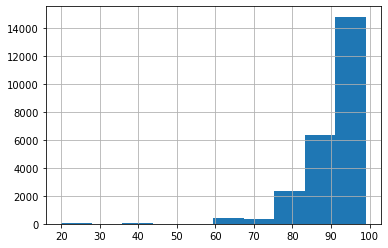

In [24]:
analysisDataFrameRanked["Review Scores Rating"].hist();

In [25]:
analysisDataFrameRanked["ScoreReviewScoresRating"].describe()

count    24451.000000
mean        53.914614
std         10.377756
min         10.346019
25%         47.706316
50%         52.354402
75%         59.103289
max         95.501617
Name: ScoreReviewScoresRating, dtype: float64

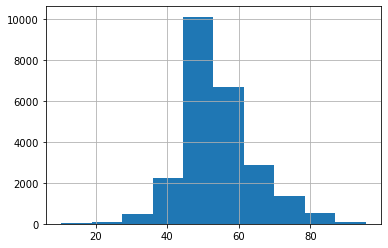

In [26]:
analysisDataFrameRanked["ScoreReviewScoresRating"].hist();

In [27]:
analysisDataFrameRanked.groupby(["Host Is Superhost"])["ScoreReviewScoresRating"].mean()

Host Is Superhost
False    52.355023
True     61.789355
Name: ScoreReviewScoresRating, dtype: float64

In [28]:
analysisDataFrameRanked.groupby(["Property type"])["ScoreReviewScoresRating"].mean().sort_values(ascending=False)

Property type
Yurt                  64.883167
Guest suite           61.128974
Bed & Breakfast       58.341430
Boat                  57.628769
In-law                56.566373
Loft                  56.390606
House                 55.754508
Townhouse             55.024203
Guesthouse            54.513711
Apartment             53.643713
Other                 52.775612
Condominium           51.486169
Dorm                  51.344426
Bungalow              51.236399
Villa                 51.084705
Chalet                51.076280
Boutique hotel        50.843998
Hostel                48.592868
Cabin                 47.913298
Treehouse             47.530891
Serviced apartment    47.256573
Timeshare             46.735700
Cave                  45.689644
Earth House           43.869776
Vacation home         43.157899
Train                 10.346019
Name: ScoreReviewScoresRating, dtype: float64

In [29]:
analysisDataFrameRanked.groupby(["Neighbourhood cleansed"])["ScoreReviewScoresRating"].mean().sort_values(ascending=False)

Neighbourhood cleansed
North Riverdale        72.051351
Eltingville            71.422139
Hollis Hills           65.266079
Silver Lake            64.308269
Springfield Gardens    63.505438
                         ...    
Marble Hill            44.891678
Emerson Hill           44.799291
Hollis                 43.011148
Westchester Square     41.702027
Little Neck            30.346019
Name: ScoreReviewScoresRating, Length: 207, dtype: float64

In [30]:
analysisDataFrameRanked.groupby(["Number of reviews"])["Review Scores Rating"].mean().sort_values(ascending=False)

Number of reviews
243.0    99.000000
339.0    99.000000
240.0    98.000000
294.0    98.000000
241.0    98.000000
           ...    
237.0    85.500000
221.0    85.000000
268.0    84.000000
2.0      82.286066
1.0      71.861059
Name: Review Scores Rating, Length: 293, dtype: float64

In [31]:
analysisDataFrameRegression= analysisDataFrameRanked[['Host Response Rate','Number of reviews',
       'Host Is Superhost', 'Host total listings count', 'City', 'latitude',
       'longitude', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Price',
       'Minimum nights', 'Maximum nights', 'Availability 365',
       'Hot tub', 'BBQ grill',
       'Game console', 'Essentials', 'Firm mattress', 'EV charger',
       'Ethernet connection', 'Bathtub with shower chair',
       'Disabled parking spot', 'Beach essentials', 'Suitable for events',
       'Doorman', 'Private entrance', 'Dishwasher',
       'Wide clearance to bed', 'Smart lock', 'Childrens books and toys',
       'Cooking basics', 'Elevator', 'Air conditioning', 'Crib',
       'Hot water', 'Oven', 'Hair dryer', 'First aid kit', 'Stove',
       'Roomdarkening shades', 'Heating', 'Extra pillows and blankets',
       'Luggage dropoff allowed', 'Wheelchair accessible', 'Baby bath',
       'Shampoo', 'Iron', 'Ground floor access', 'Dryer', 'Breakfast',
       'Washer  Dryer', 'Lockbox', 'Internet', 'Other',
       'Cleaning before checkout', 'Microwave',
       'translation missing enhostingamenity50', 'Pets allowed',
       'High chair', 'Buzzerwireless intercom', 'Fireplace guards',
       'Pool', 'Coffee maker', 'Wide hallway clearance', 'Gym',
       '24hour checkin', 'Accessibleheight bed',
       'smooth pathway to front door', 'Welllit path to entrance',
       'Pack n Playtravel crib', 'Self CheckIn', 'Wide doorway',
       'Familykid friendly', 'Lock on bedroom door',
       'Free parking on premises', 'Wireless Internet',
       'Free parking on street', 'Bed linens',
       'Fixed grab bars for shower  toilet', 'Stair gates',
       'Air purifier', 'Pets live on this property',
       'Dishes and silverware', 'Keypad', 'Private bathroom',
       'Table corner guards', 'Cats', 'Single level home',
       'Accessibleheight toilet', 'Outlet covers', 'Smoking allowed',
       'Babysitter recommendations', 'Indoor fireplace', 'Ski inSki out',
       'Flat', 'Rollin shower with chair', 'Fire extinguisher',
       'Host greets you', 'Washer', 'Handheld shower head',
       'Wide entryway', 'Laptop friendly workspace', 'Hangers',
       'Private living room', 'Carbon monoxide detector',
       'translation missing enhostingamenity49',
       'Wide clearance to shower  toilet', 'Bathtub', 'Dogs',
       'Beachfront', 'Other pets', 'Lake access', 'Patio or balcony',
       'Waterfront', 'Childrens dinnerware', 'TV', 'Cable TV',
       'Garden or backyard', 'Pocket wifi', 'Long term stays allowed',
       'Kitchen', 'Smoke detector', 'Safety card', 'Window guards',
       'Hot water kettle', 'Refrigerator', 'Baby monitor',
       'Stepfree access', 'Changing table','Review Scores Rating', 'ScoreReviewScoresRating']]

In [32]:
cat_cols = analysisDataFrame.select_dtypes(include=['object']).columns

def create_dummy(df, cat_cols, dummy_na):
        for col in  cat_cols:
            try:
                # for each cat add dummy var, drop original column
                df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
            except:
                continue
        return df
    
analysisDataFrameRegression = create_dummy(analysisDataFrameRegression, cat_cols, False)

In [33]:
analysisDataFrameRegression.head()

,Host Response Rate,Number of reviews,Host Is Superhost,Host total listings count,latitude,longitude,Accommodates,Bathrooms,Bedrooms,Price,...,Refrigerator,Baby monitor,Stepfree access,Changing table,Review Scores Rating,ScoreReviewScoresRating,City_Brooklyn,City_Manhattan,City_Queens,City_Staten Island
0,1.0,66.0,False,4.0,40.866889,-73.857756,1.0,1.0,1.0,43.0,...,1,0,0,0,96.0,66.383167,0,0,0,0
1,1.0,38.0,False,1.0,40.829392,-73.865137,1.0,1.0,1.0,28.0,...,0,0,0,0,89.0,56.097056,0,0,0,0
2,1.0,18.0,False,16.0,40.869139,-73.895096,4.0,3.0,2.0,80.0,...,0,0,0,0,90.0,50.875155,0,0,0,0
3,0.7,7.0,False,1.0,40.868719,-73.891438,4.0,1.0,1.0,140.0,...,0,0,0,0,85.0,44.872425,0,0,0,0
4,1.0,56.0,False,1.0,40.863628,-73.894787,2.0,1.0,1.0,60.0,...,1,0,0,0,95.0,63.609521,0,0,0,0


In [34]:
col_to_predict = "ScoreReviewScoresRating"

print(analysisDataFrameRegression.shape)


X = analysisDataFrameRegression.drop(col_to_predict, axis=1)
y = analysisDataFrameRegression[col_to_predict]
X = X.drop("Review Scores Rating", axis=1) 

lm_model = LinearRegression(normalize=True) # Instantiate

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state = 50)

lm_model.fit(X_train, y_train) #Fit

y_train_preds = lm_model.predict(X_test)

#Score using your model
train_r2 = r2_score(y_test, y_train_preds)
train_mean_squared_error=mean_squared_error(y_test, y_train_preds)

print(train_r2)
print(train_mean_squared_error)


(24451, 135)
0.8106181519764758
20.925812920190253


In [35]:
col_to_predict = "ScoreReviewScoresRating"

print(analysisDataFrameRegression.shape)


X = analysisDataFrameRegression.drop(col_to_predict, axis=1)
y = analysisDataFrameRegression[col_to_predict]

X = X.drop("Number of reviews", axis=1)
X = X.drop("Review Scores Rating", axis=1) 

lm_model = LinearRegression(normalize=True) # Instantiate

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state = 50)    

lm_model.fit(X_train, y_train) #Fit

y_train_preds = lm_model.predict(X_test)

#Score using your model
train_r2 = r2_score(y_test, y_train_preds)
train_mean_squared_error=mean_squared_error(y_test, y_train_preds)

print(train_r2)
print(train_mean_squared_error)


(24451, 135)
0.3253162875442347
74.54941059290468


In [36]:
col_to_predict = "Review Scores Rating"

print(analysisDataFrameRegression.shape)


X = analysisDataFrameRegression.drop(col_to_predict, axis=1)
y = analysisDataFrameRegression[col_to_predict]
X = X.drop("ScoreReviewScoresRating", axis=1) 

lm_model = LinearRegression(normalize=True) # Instantiate

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state = 50)    

lm_model.fit(X_train, y_train) #Fit

y_train_preds = lm_model.predict(X_test)

#Score using your model
train_r2 = r2_score(y_test, y_train_preds)
train_mean_squared_error=mean_squared_error(y_test, y_train_preds)

print(train_r2)
print(train_mean_squared_error)


(24451, 135)
0.15456010625348382
62.32352347683745


In [37]:
col_to_predict = "Review Scores Rating"

print(analysisDataFrameRegression.shape)


X = analysisDataFrameRegression.drop(col_to_predict, axis=1)
y = analysisDataFrameRegression[col_to_predict]

X = X.drop("Number of reviews", axis=1)
X = X.drop("ScoreReviewScoresRating", axis=1) 

lm_model = LinearRegression(normalize=True) # Instantiate

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state = 50)    

lm_model.fit(X_train, y_train) #Fit

y_train_preds = lm_model.predict(X_test)

#Score using your model
train_r2 = r2_score(y_test, y_train_preds)
train_mean_squared_error=mean_squared_error(y_test, y_train_preds)

print(train_r2)
print(train_mean_squared_error)


(24451, 135)
0.1500540813130954
62.6556953476431
